In [1]:
import matplotlib.pyplot as pyplot
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, neighbors 
import numpy as np

/Users/sergmiller/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%matplotlib inline

Генерация данных (2 признака, 4 класса)

In [3]:
N = 150

In [4]:
classification_problem = datasets.make_classification(n_samples=N, n_features =2, n_informative = 2, 
                                                      n_classes = 4, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=1)

In [5]:
colors = ListedColormap(['red', 'blue', 'yellow','green'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow','lightgreen'])

In [6]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

105


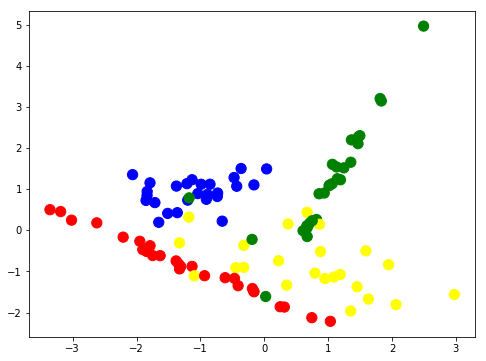

In [7]:
pyplot.figure(figsize=(8,6))
pyplot.scatter(list(map(lambda x: x[0], train_data)), list(map(lambda x: x[1], train_data)), 
              c=train_labels, cmap = colors, s=len(train_data))
print(len(train_data))

Построение разделяющей поверхности для некоторых значений k_neighbors

In [8]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [9]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))
    pyplot.show()

k =  1


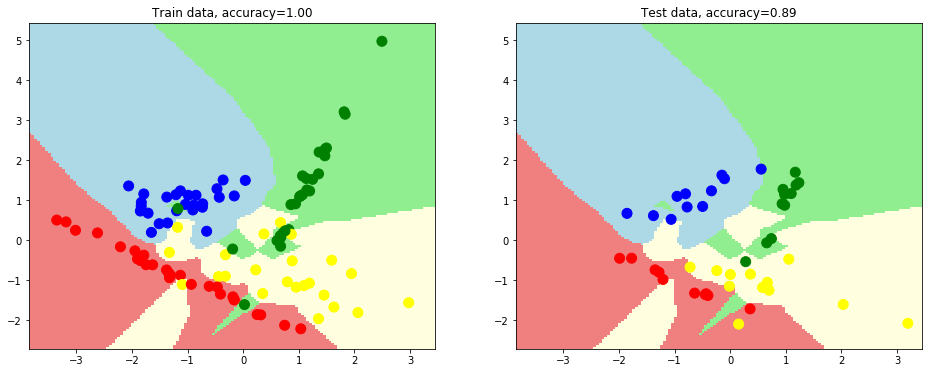

k =  2


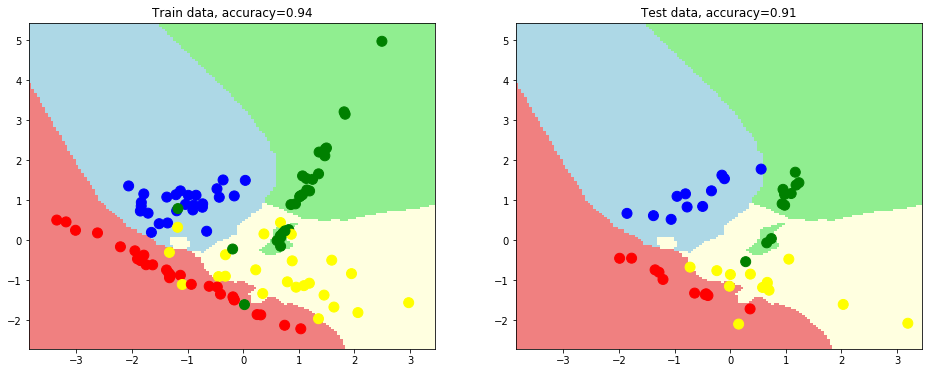

k =  3


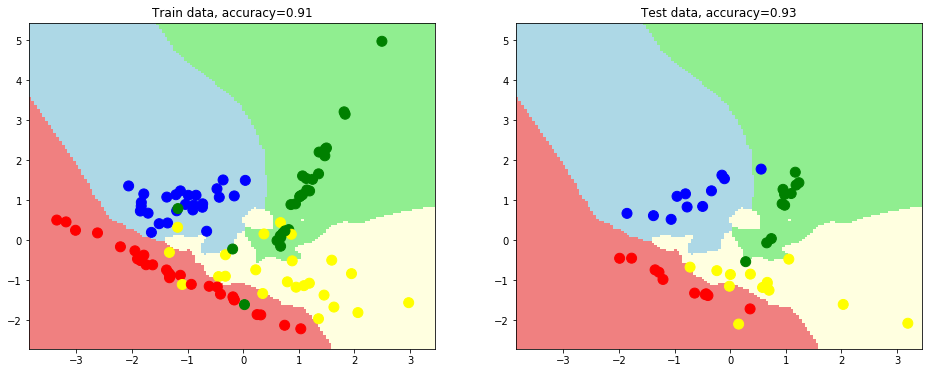

k =  5


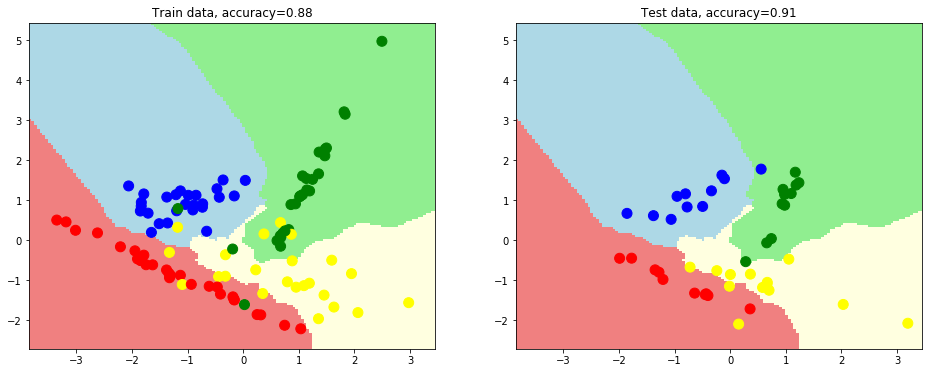

k =  10


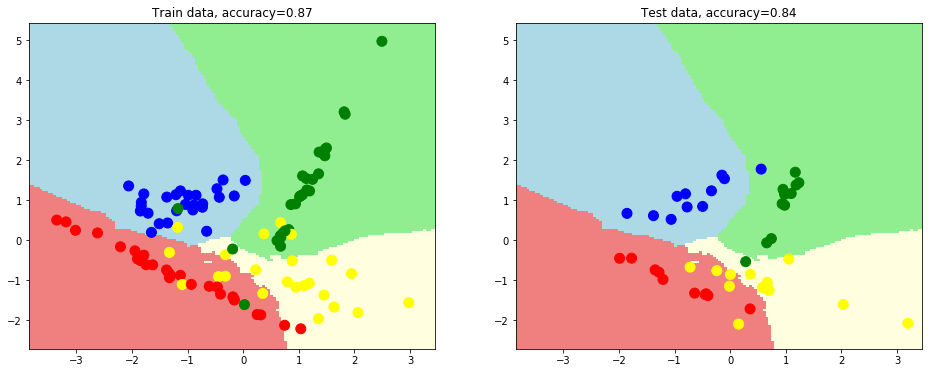

k =  30


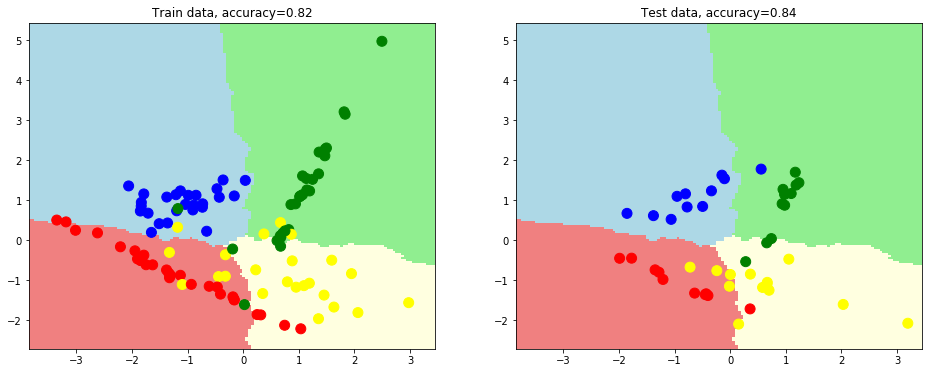

k =  70


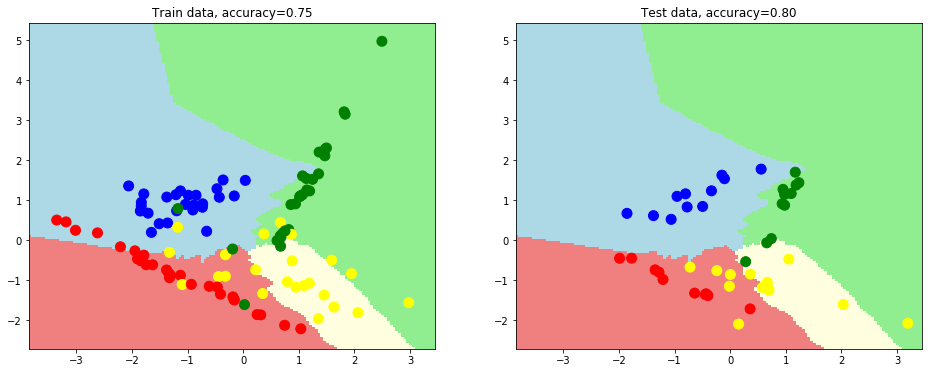

In [10]:
ks = [1,2,3,5,10,30,70]
for k in ks:
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    print('k =  ' + str(k))
    plot_decision_surface(clf, train_data,train_labels,test_data,test_labels)

Выберем оптимальное значение k при помощи 5-fold cross-validation

In [11]:
average_scores = []
K = 5
max_k = (len(train_labels)*(K-1))//K-1
for k in range(1,max_k):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_validation.cross_val_score(clf, train_data, train_labels, cv=K)
    average_scores.append(np.mean(scores))

best k = 4 best mean 5-cv accuracy = 0.896879550655


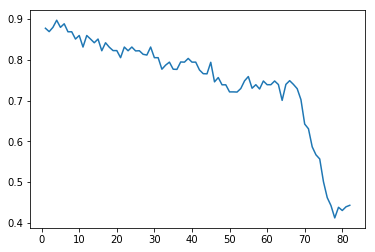

(0.85, 0.9)

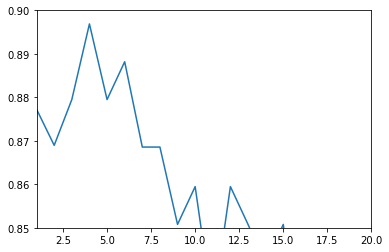

In [13]:
print('best k = ' + str(1 + np.argmax(average_scores)), 'best mean 5-cv accuracy = ' + str(np.max(average_scores)))
pyplot.plot(np.arange(1,max_k), average_scores)
pyplot.show()
pyplot.plot(np.arange(1,max_k), average_scores)
pyplot.xlim([1,20])
pyplot.ylim([0.85,0.9])

Для сгенерированных данных наилучшее k = 4, дающее в среднем accuracy = 0.9 по 5-fold cv 